In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import os

In [ ]:
# Abrindo arquivo: configurar webscraping no futuro
#df = pd.read_excel('C:/Users/lucas/OneDrive/Desktop/Fazenda/notas.xlsx')

#df['Emissão'] = pd.to_datetime(df['Emissão'])

#df.set_index('Emissão')

#autorizadas = df.loc[df['Sit. NF'].str.contains('AUTORI' )==True]
#autorizadas

In [171]:
# output all the tables in the PDF to a CSV
arqs = os.listdir('C:/Users/lucas/OneDrive/Desktop/Fazenda/Notas/')

#Extraindo colunas dos pdfs

fazenda = []
for i in arqs:
    table = tabula.read_pdf('C:/Users/lucas/OneDrive/Desktop/Fazenda/Notas/'+ i, pages = "all", multiple_tables = True)
    for j in range(0,len(table[5])): 
        if pd.notnull(table[5]['Unnamed: 4'][j]):
            fazenda.append([table[1]['DATA DE EMISSÃO'][0],table[1]['NOME / RAZÃO SOCIAL'][0],table[5]['Código'][j],table[5]['Unnamed: 4'][j],table[5]['Valor'][j]])
        else:
            pass
        
#criando o dataframe     
df = pd.DataFrame(fazenda,columns=['Data','Origem','Tipo','Quantidade','Valor'])


df['Data'][32] = '2020-02-11 10:42:30' # ERRADO NA NOTA FISCAL


#set index in to datetime

df['Data'] =pd.to_datetime(df['Data'])
df = df.set_index('Data')


#convertendo colunas para valores
for i in range(0,len(df)):
    df['Quantidade'][i] = df['Quantidade'][i].replace('.','')
    df['Valor'][i] = df['Valor'][i].replace('.','')
    df['Quantidade'][i] = float(df['Quantidade'][i].replace(',','.'))
    df['Valor'][i] = float(df['Valor'][i].replace(',','.'))
    if df['Origem'][i] == 'LUIZ JOAO CHACHA':
        df['Quantidade'][i] = df['Quantidade'][i]*-1
    else:
        pass
df['Total'] = df['Quantidade']*df['Valor']

df['Estoque'] = df['Quantidade'].cumsum()

In [168]:
x = df.loc[df['Tipo'].str.contains( '53930') ==True]

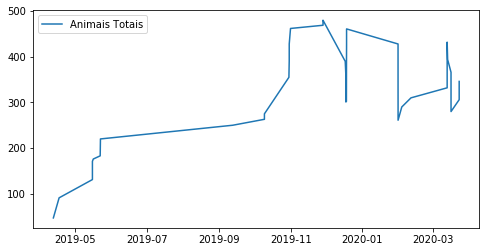

In [221]:
#Estoque

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

ax.plot(df['Quantidade'].sort_index().cumsum())
ax.legend(['Estoque'],loc=2)
#ax.axvline('2014-02-01', color='black', lw=1, alpha=0.5)
#ax.axvline('2018-01-01', color='black', lw=1, alpha=0.5)
#ax.axhline(1, color='black', lw=1, alpha=0.5)

#ax[1].plot(crimes_corruption['2009':'2019'].resample('M').title.count() )
#ax[1].plot(df['offences'].resample('M').count() - crimes_corruption['2009':'2019'].resample('M').title.count() )
#ax[1].axvline('2013-08-01', color='black', lw=1, alpha=0.5)
#ax[1].axvline('2018-08-01', color='black', lw=1, alpha=0.5)
#ax[1].axhline(1, color='black', lw=1, alpha=0.5)
#fig.savefig('faz.pdf')

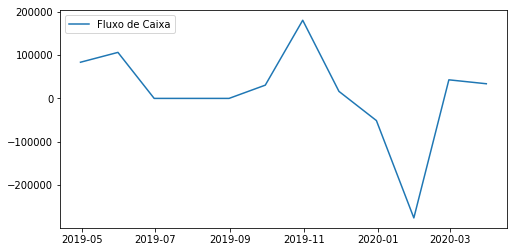

In [222]:
#Fluxo de Caixa

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

ax.plot(df['Total'].resample('M').sum())
ax.legend(['Fluxo de Caixa'],loc=2)


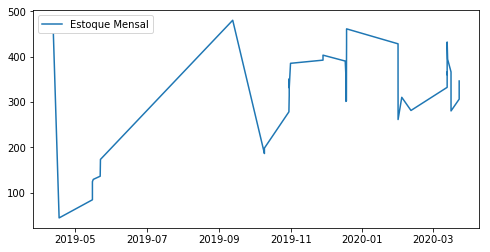

In [234]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

ax.plot(df['Estoque'].sort_index())
ax.legend(['Estoque Mensal'],loc=2)


In [240]:
df

,level_0,index,Origem,Tipo,Quantidade,Valor,Total,Estoque
Data,,,,,,,,
2019-04-17 06:36:40,0,0,ANTONIO CARLOS GOLEMBA SANTANA,53930 FEMEA DE 4 A 12M - OP INTERNA - GADO BOVINO,44,830,36520,44
2019-05-15 16:36:54,1,1,GENICY F M CAMPETTI/CARLOS H CAMPETTI,53930 FEMEA DE 4 A 12M - OP INTERNA - GADO BOVINO,40,880,35200,84
2019-05-15 16:40:48,2,2,GENICY F M CAMPETTI/CARLOS H CAMPETTI,53930 FEMEA DE 4 A 12M - OP INTERNA - GADO BOVINO,40,880,35200,124
2019-05-16 10:24:52,3,3,GENICY F M CAMPETTI/CARLOS H CAMPETTI,53930 FEMEA DE 4 A 12M - OP INTERNA - GADO BOVINO,5,880,4400,129
2019-05-22 07:39:32,4,4,IRAN SOUZA AMORIM,905,7,800,5600,136
2019-05-22 13:00:41,5,5,ADENIR DE SOUZA AMORIM,53930 FEMEA DE 4 A 12M - OP INTERNA - GADO BOVINO,37,698.55,25846.3,173
2019-10-09 10:07:05,6,6,FIDELCINO LIMA,905,13,850,11050,186
2019-10-09 10:07:05,7,7,FIDELCINO LIMA,53930 FEMEA DE 4 A 12M - OP INTERNA - GADO BOVINO,12,850,10200,198
2019-10-30 07:31:47,8,8,MARCELO LEMES DE AMORIM,53930 FEMEA DE 4 A 12M - OP INTERNA - GADO BOVINO,80,698.55,55884,278


In [242]:
bezerra = df.loc[df['Tipo'].str.contains( '53930|53978') ==True]
novilha = df.loc[df['Tipo'].str.contains( '905') ==True]
vaca = df.loc[df['Tipo'].str.contains( '850') ==True]